In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [17]:
# step3 : extracting input columns(features) and output(target)
X = data.iloc[:,0:1].values

In [16]:
y = data.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [22]:
# step4 : Cross-validation or train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(24, 1)

In [24]:
X_test.shape

(6, 1)

In [26]:
y_train.shape

(24,)

In [28]:
y_test.shape

(6,)

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [30]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
X_test[5]

array([2.9])

In [40]:
y_test[5]

56642.0

In [52]:
#reg.predict(X_test[5].reshape(1,1))
def salary_predictor(experience):
    return reg.predict(np.array(experience).reshape(1,1))[0]

salary_predictor(500)

4750773.360926206

In [50]:
exp = data['YearsExperience'].values
exp

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [63]:
# How it works :- 

plt.scatter(exp,y)
plt.plot(X_train,reg.predict(X_train),color='red')

In [60]:
c = reg.intercept_

In [61]:
m = reg.coef_[0]

In [62]:
m*500+c

4750773.360926206

In [64]:
from sklearn.metrics import r2_score

In [66]:
y_pred=reg.predict(X_test)
y_pred

array([103281.8912346 , 123126.81210966,  38077.15121656,  54142.08716303,
       125016.80457395,  53197.09093089])

In [67]:
y_test

array([113812., 122391.,  46205.,  60150., 121872.,  56642.])

In [68]:
r2_score(y_test,y_pred)

0.9637610434686119

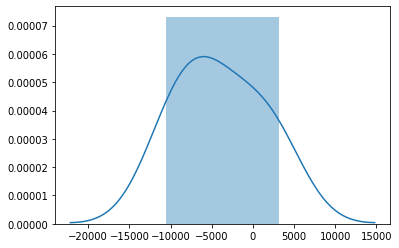

In [71]:
sns.distplot(y_pred-y_test)